# Linear Algebra (CpE210A)

<h4> Laboratory 2: Plotting Vectors using NumPy and MatPlotLib </h4>

Coded and submitted by:<br>
Panelo, Bryan V.<br>
58011<br>
<br>
##### Lab Exercises:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

### Part 1: Skyline Eagle Fly
You are tasked to make a tracking device for Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors only give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative displacement of the eagle from its nest. It is expected that the eagles will change exactly two times, it can then be assumed that the program will show three displacements. Please make a prototype code using the additional information given below:
<br>
<br>
Consider the computational algorithm:

Let the eagle's longitudinal and latitudinal be  long  and  lat  respectively.
Let the eagle's total distance as  disttotal , displacement be  disp , and  θ  as the direction of the vector.

$$_{(Eq.1)} dist_{total} = (long_{total}) \hat{x} + (lat_{total}) \hat{y} \\ 
_{(Eq.2)} disp = \sqrt{{dist_x}^2 + {dist_y}^2}\\ 
_{(Eq.3)} \theta = \arctan{\left(\frac{y}{\alpha x} \right)}$$
```

In [81]:
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3)
    lat = np.random.randint(-10,10, size=3)
    
    dist1 = np.array([long[0], lat[0]])
    dist2 = np.array([long[1], lat[1]])
    dist3 = np.array([long[2], lat[2]])
    
    dispTotal = dist1 + dist2 + dist3
    displacement = np.linalg.norm(dispTotal)
    
    alpha = 10**-6
    theta = np.arctan(dispTotal[1]/(dispTotal[0]+alpha))
    theta = np.degrees(theta)

    print(dist1)
    print(dist2)
    print(dist3)
    print(dispTotal)
    print(displacement)
    print(theta)


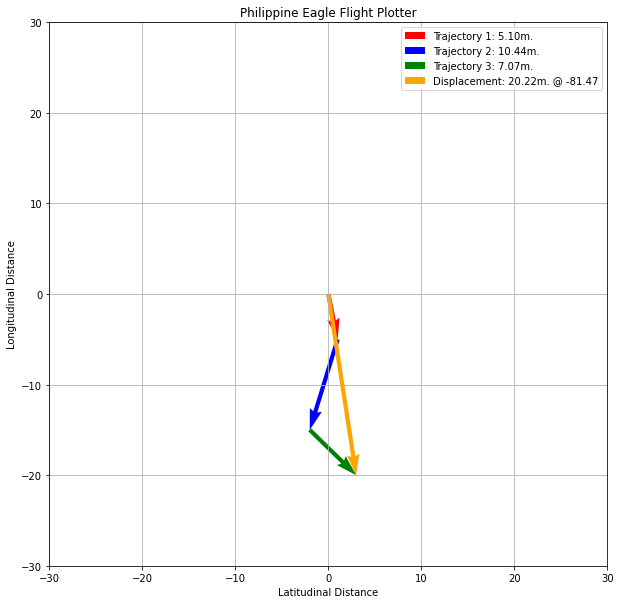

In [118]:
  ## Plotting the PH Eagle flight vectors.
plt.figure(figsize=(10,10))
plt.title('Philippine Eagle Flight Plotter')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.xlabel('Latitudinal Distance')
plt.ylabel('Longitudinal Distance')
plt.grid()
n = 2
##From the first cell!!!!

def track_eagle(make_figs=True):
 long = np.random.randint(-10,10, size=3)
lat = np.random.randint(-10,10, size=3)
    
dist1 = np.array([long[0], lat[0]])
dist2 = np.array([long[1], lat[1]])
dist3 = np.array([long[2], lat[2]])
 
dispTotal = dist1 + dist2 + dist3
displacement = np.linalg.norm(dispTotal)
    
alpha = 10**-6
theta = np.arctan(dispTotal[1]/(dispTotal[0]+alpha))
theta = np.degrees(theta)

plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
plt.quiver(0,0, dispTotal[0], dispTotal[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(displacement, theta))
    
plt.legend()

def track_eagle(make_figs=True):
 if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
plt.show()

<br>

### Part 2: Reverse Engineering
Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below


In [84]:
def eagle_kinematics(s, t):
    req_shape = 4
    v = np.zeros((req_shape-1,))
    a = np.zeros((req_shape-2,))
    t_vect = np.array([t**3, t**2, t, 1])
    if s.shape == (req_shape,):
        v = np.array([3*s[0],2*s[1], s[2]])
        a = np.array([2*v[0],v[1]])
        s_t = np.sum(np.multiply(s, t_vect))
        v_t = np.sum(np.multiply(v, t_vect[1:]))
        a_t = np.sum(np.multiply(a, t_vect[2:]))
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return s_t, v_t, a_t

In [85]:
x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

<br>

<br>

## Part 3: Bebang's Online Business
You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.


In [7]:
def month_profit_trace(profit = np.array([1000, 100, 500, 10]),
                        reach = np.array([-18000, 3000, 12000, 10000]),
                        make_figs=True):
    if (profit.shape == (4,)) and (reach.shape == (4,)):
#         reach  = np.array([1000, 100, 500, 10]) 
#         profit = np.array([-18000, 3000, 12000, 10000])
        
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        
        week_total = week1 + week2 + week3 + week4    
        week_performance = np.linalg.norm(week_total)
        alpha = 10**-6
        reach_gradient = np.arctan(week_total[1]/(week_total[0]+alpha))
       
        print(week1)
        print(week2)
        print(week3)
        print(week4)
        print(week_total)
        print(week_performance)

In [9]:
month_profit_trace()


[-18000   1000]
[3000  100]
[12000   500]
[10000    10]
[7000 1610]
7182.764091907794


In [20]:
def month_profit_trace(profit = np.array([1000, 100, 500, 10]),
                        reach = np.array([-18000, 3000, 12000, 10000]),
                        make_figs=True):
    if (profit.shape == (4,)) and (reach.shape == (4,)):
#         reach  = np.array([1000, 100, 500, 10]) 
#         profit = np.array([-18000, 3000, 12000, 10000])
        
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        
        week_total = week1 + week2 + week3 + week4    
        week_performance = np.linalg.norm(week_total)
        alpha = 10**-6
        reach_gradient = np.arctan(week_total[1]/(week_total[0]+alpha))
        
plt.figure(figsize=(16,5))
plt.title('Bebang\'s Month Post Efficiency')
plt.xlim(0,1.01*np.sum(reach))
plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
plt.xlabel('FB Post Reach Increment')
plt.ylabel('Profit')
plt.grid()
n = 2

        #Week 1
plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        #Week 2
plt.quiver(week1[0], week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='green', width=0.0025, 
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        #Week 3
plt.quiver((week1[0] + week2[0]), (week1[1] + week2[1]), week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025, 
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        #Week 4
plt.quiver((week1[0] + week2[0] + week3[0]), (week1[1] + week2[1] + week3[1]), week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025, 
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
             
        
        #Efficiency
plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='orange', width=0.005, 
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

plt.legend(loc='upper left')


def month_profit_trace(profit = np.array([1000, 100, 500, 10]),
                        reach = np.array([-18000, 3000, 12000, 10000]),
                        make_figs=True):

 if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

plt.show()

else:
        print('The value you entered cannot be applied')

SyntaxError: invalid syntax (<ipython-input-20-a160a5d23d76>, line 59)